# ZonaProp - Modelos predictivos

### Cargamos las librerias que vamos a usar

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse.linalg import svds

In [5]:
df = pd.read_csv('../Tp1/data/train.csv')

#### Data cleaning

In [6]:
def nulls(df):
    nulls = pd.DataFrame((df.isnull().sum().sort_values()/len(df)*100).round(2),columns=['porcentaje de NaN'])
    nulls.drop(nulls.loc[nulls.loc[:,'porcentaje de NaN']<=0].index, inplace=True)
    plt.figure(figsize=(12,8))
    ax = nulls['porcentaje de NaN'].plot.barh()
    ax.set_title('Porcentaje de valores nulos en cada columna',fontsize=20, y=1.02)
    ax.set_xlabel('Porcentaje del total %', fontsize=16)
    ax.set_ylabel('columnas', fontsize=16)
    ax.grid(axis='x')

    for y, x in enumerate(nulls['porcentaje de NaN']):
        ax.text(x, y, s=str(x)+'%', color='black', fontweight='bold',va='center')
        
    plt.show()
    

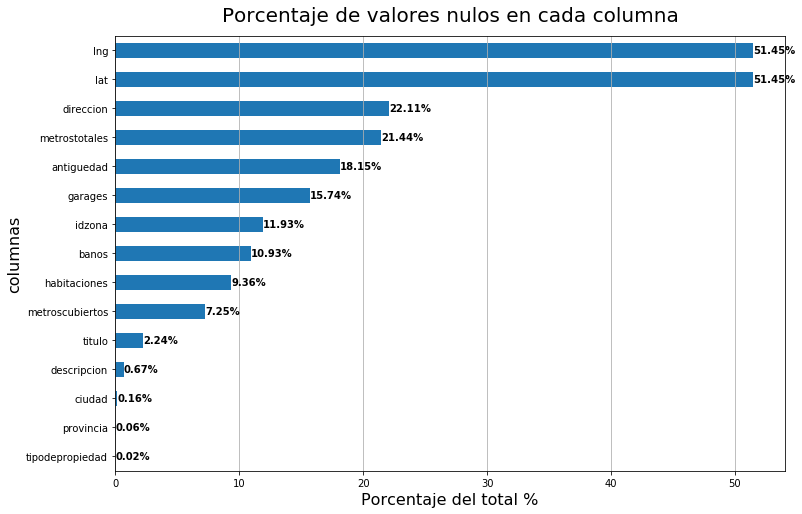

In [7]:
nulls(df)

In [8]:
df.dropna(subset=['tipodepropiedad','provincia','ciudad'],inplace=True)

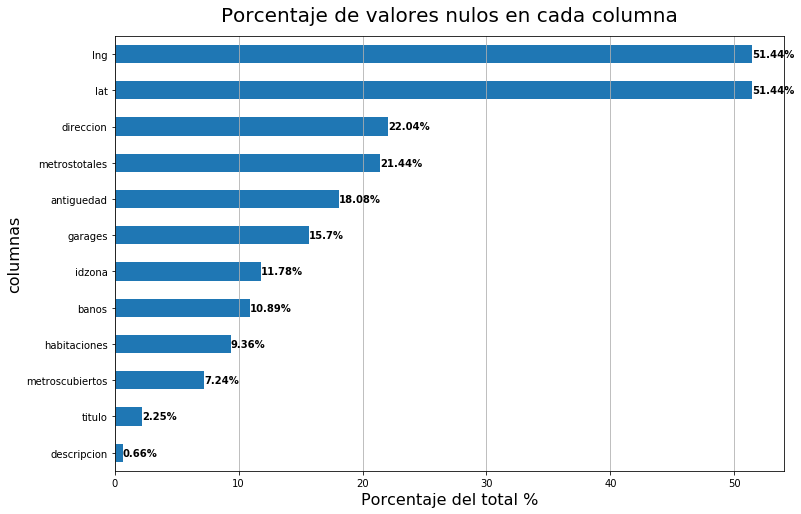

In [9]:
nulls(df)

In [10]:
df.drop(columns=['titulo','descripcion','id','idzona','direccion'],inplace=True)

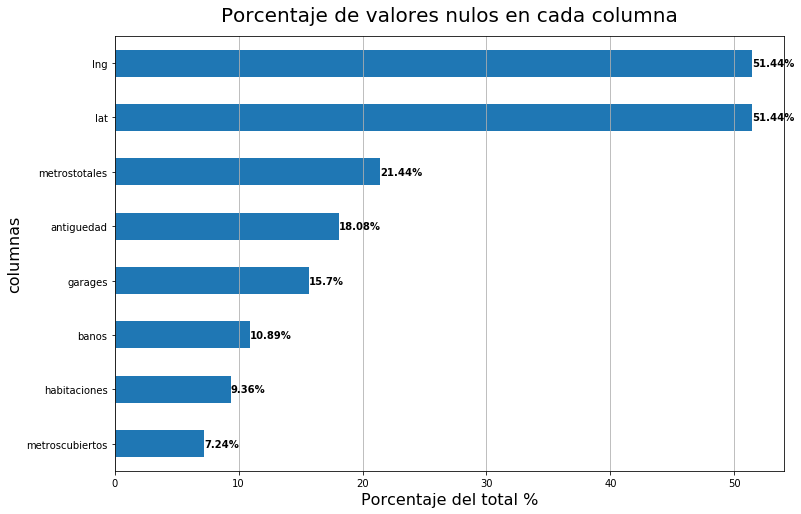

In [11]:
nulls(df)

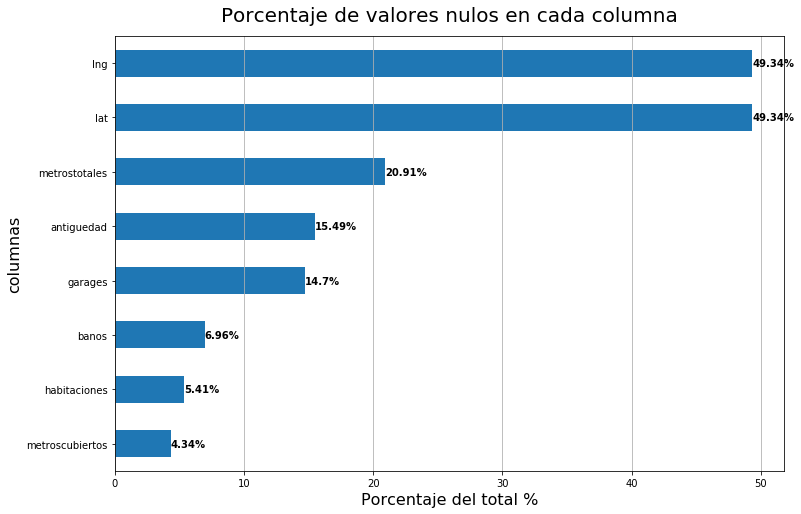

In [12]:
df1 = df[df.tipodepropiedad == 'Terreno'].fillna(0)
df = df[df.tipodepropiedad != 'Terreno']
df = pd.concat([df,df1])
nulls(df)

In [13]:
df.metroscubiertos, df.metrostotales = np.where(df.metroscubiertos>df.metrostotales,[df.metrostotales,df.metroscubiertos],[df.metroscubiertos,df.metrostotales])

In [14]:
df.loc[df.metrostotales.isnull()].groupby('tipodepropiedad').count()

,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
tipodepropiedad,,,,,,,,,,,,,,,,,
Apartamento,27936,27936,23111,27424,26168,27189,27936,0,14635,14635,27936,27936,27936,27936,27936,27936,27936
Bodega comercial,269,269,194,31,146,145,269,0,124,124,269,269,269,269,269,269,269
Casa,16626,16626,14369,16151,10654,14953,16626,0,7172,7172,16626,16626,16626,16626,16626,16626,16626
Casa en condominio,2145,2145,1836,2106,1552,1992,2145,0,1020,1020,2145,2145,2145,2145,2145,2145,2145
Casa uso de suelo,109,109,91,79,52,80,109,0,59,59,109,109,109,109,109,109,109
Departamento Compartido,40,40,37,38,39,37,40,0,24,24,40,40,40,40,40,40,40
Duplex,25,25,25,25,24,24,25,0,13,13,25,25,25,25,25,25,25
Edificio,147,147,110,52,95,48,147,0,79,79,147,147,147,147,147,147,147
Garage,1,1,0,0,1,0,1,0,0,0,1,1,1,1,1,1,1


In [15]:
cond = (df.tipodepropiedad == 'Apartamento') & (df.metrostotales.isnull())

In [16]:
df.metrostotales = np.where(cond,df.metroscubiertos,df.metrostotales)

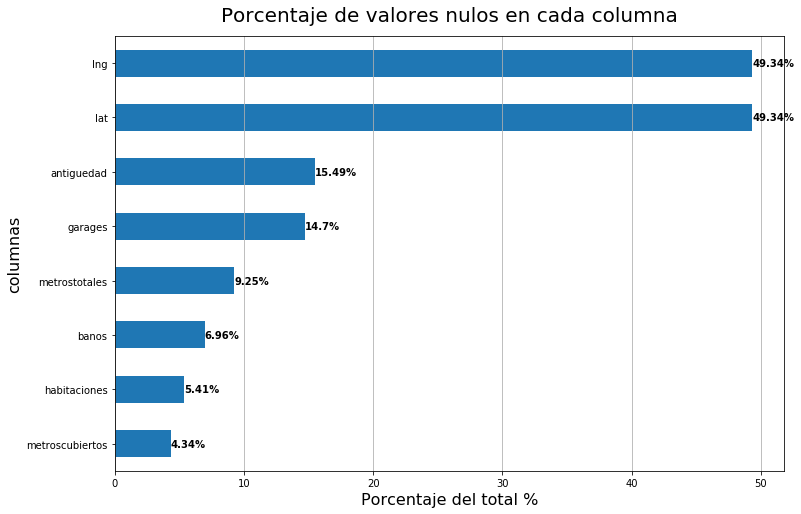

In [17]:
# Así queda sin asignar ningún valor de manera "arbitraria", solo corregimos los errores de carga.
nulls(df)

In [18]:
df.metrostotales = np.where(df.metrostotales.isnull(),df.metroscubiertos,df.metrostotales)

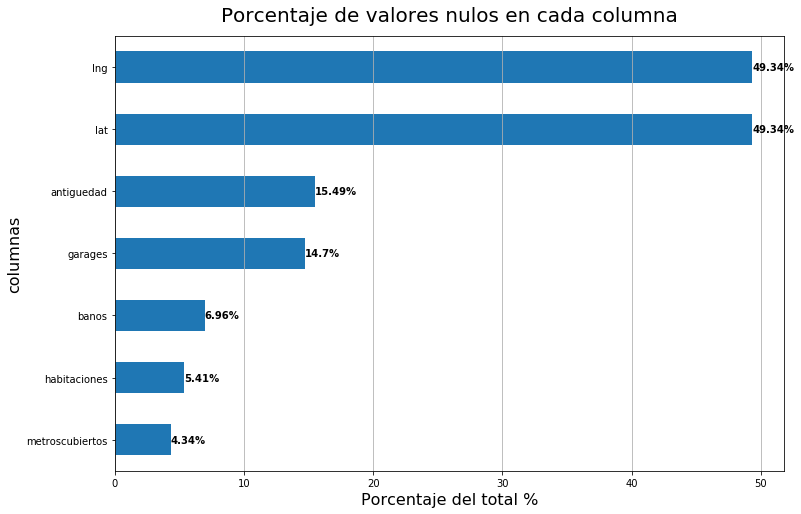

In [19]:
nulls(df)
#acá hay algo raro. No debería haber qwuedado en 4,34%?

In [20]:
df.metroscubiertos = np.where(df.metroscubiertos.isnull(),df.metrostotales,df.metroscubiertos)

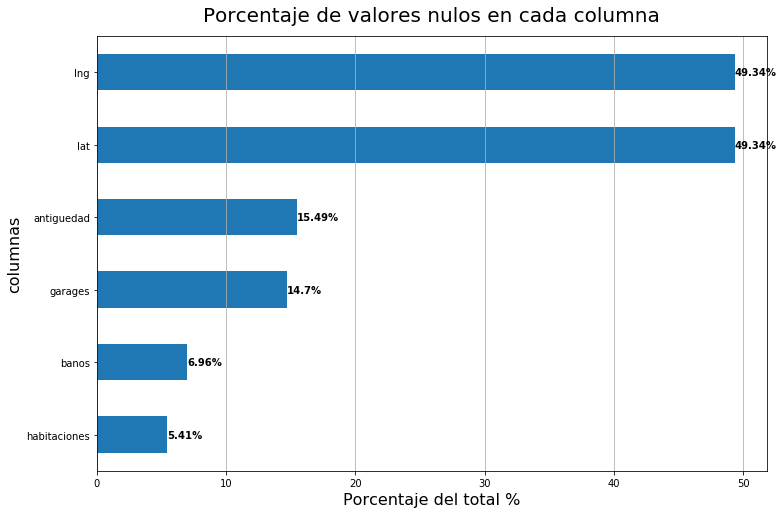

In [21]:
nulls(df)

In [22]:
df.loc[(df.tipodepropiedad == 'Terreno') & (df.metroscubiertos !=0)]

,tipodepropiedad,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
207,Terreno,Alvaro Obregón,Distrito Federal,0.0,0.0,0.0,0.0,402.0,402.0,19.379037,-99.192224,2016-03-15 00:00:00,0.0,0.0,0.0,0.0,0.0,9000000.0
262,Terreno,Tepeji del Río de Ocampo,Hidalgo,0.0,0.0,0.0,0.0,426.0,426.0,0.000000,0.000000,2015-10-27 00:00:00,0.0,0.0,1.0,0.0,1.0,1182000.0
397,Terreno,Zapopan,Jalisco,0.0,0.0,2.0,1.0,230.0,230.0,0.000000,0.000000,2016-11-01 00:00:00,0.0,0.0,1.0,1.0,1.0,3100000.0
717,Terreno,Gustavo A. Madero,Distrito Federal,0.0,0.0,0.0,0.0,145.0,145.0,0.000000,0.000000,2016-12-10 00:00:00,0.0,0.0,0.0,0.0,0.0,1590000.0
797,Terreno,Miguel Hidalgo,Distrito Federal,0.0,0.0,0.0,0.0,427.0,427.0,0.000000,0.000000,2015-07-07 00:00:00,0.0,0.0,0.0,1.0,1.0,2850000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239447,Terreno,Naucalpan de Juárez,Edo. de México,0.0,0.0,0.0,0.0,200.0,200.0,19.508448,-99.277177,2014-05-01 00:00:00,0.0,0.0,0.0,1.0,1.0,925000.0
239527,Terreno,Naucalpan de Juárez,Edo. de México,0.0,0.0,0.0,0.0,219.0,219.0,19.519431,-99.280142,2014-11-04 00:00:00,0.0,0.0,0.0,0.0,1.0,1900000.0
239576,Terreno,Benito Juárez,Distrito Federal,0.0,0.0,0.0,0.0,310.0,310.0,19.371209,-99.166937,2016-06-05 00:00:00,0.0,0.0,0.0,0.0,0.0,12100000.0
239825,Terreno,San Andrés Cholula,Puebla,0.0,0.0,0.0,0.0,269.0,269.0,19.003185,-98.266317,2015-11-29 00:00:00,0.0,0.0,0.0,1.0,1.0,2017000.0


In [23]:
cond1= (df.tipodepropiedad == 'Terreno') & (df.metroscubiertos !=0)
df.metroscubiertos = np.where(cond1,0,df.metroscubiertos)

In [24]:
(df.metrostotales==0).value_counts()

False    239600
Name: metrostotales, dtype: int64

In [25]:
df.loc[df.metrostotales<df.metroscubiertos]

,tipodepropiedad,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio


In [26]:
# Habitaciones

In [27]:
df.habitaciones.isnull().value_counts()

False    226647
True      12953
Name: habitaciones, dtype: int64

In [28]:
df.loc[df.habitaciones.isnull()]

,tipodepropiedad,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
13,Casa,Benito Juárez,Distrito Federal,20.0,NaN,0.0,NaN,185.0,227.0,19.374895,-99.149519,2015-03-31 00:00:00,0.0,0.0,0.0,0.0,0.0,3000000.0
14,Casa,Zapopan,Jalisco,NaN,NaN,2.0,4.0,231.0,250.0,20.729601,-103.431993,2014-11-25 00:00:00,0.0,0.0,0.0,0.0,0.0,5300000.0
29,Terreno comercial,Zapopan,Jalisco,20.0,NaN,0.0,NaN,150.0,150.0,20.784515,-103.477062,2016-12-03 00:00:00,0.0,0.0,0.0,1.0,0.0,10707900.0
80,Local Comercial,Naucalpan de Juárez,Edo. de México,NaN,NaN,NaN,NaN,70.0,70.0,19.512083,-99.261455,2016-12-17 00:00:00,0.0,0.0,0.0,0.0,0.0,2350000.0
89,Casa,Cuernavaca,Morelos,28.0,NaN,NaN,2.0,396.0,396.0,NaN,NaN,2014-11-17 00:00:00,0.0,0.0,0.0,0.0,0.0,3975000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239877,Local Comercial,Monterrey,Nuevo León,5.0,NaN,0.0,NaN,270.0,270.0,25.728966,-100.347628,2015-09-14 00:00:00,0.0,0.0,0.0,1.0,1.0,3240000.0
239913,Casa,Querétaro,Querétaro,NaN,NaN,NaN,NaN,114.0,128.0,NaN,NaN,2015-11-15 00:00:00,0.0,0.0,0.0,0.0,0.0,1350000.0
239919,Local Comercial,San Andrés Cholula,Puebla,NaN,NaN,NaN,NaN,64.0,64.0,19.004596,-98.266454,2016-09-26 00:00:00,0.0,0.0,0.0,0.0,0.0,2906100.0
239925,Local Comercial,Coyoacán,Distrito Federal,1.0,NaN,3.0,NaN,115.0,115.0,19.301724,-99.161113,2015-08-05 00:00:00,0.0,0.0,0.0,0.0,1.0,4025000.0


In [29]:
df.loc[df.habitaciones.isnull()].groupby('tipodepropiedad').count().sort_values(by='precio')

,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
tipodepropiedad,,,,,,,,,,,,,,,,,
Garage,1,1,0,0,1,0,1,1,0,0,1,1,1,1,1,1,1
Duplex,3,3,3,0,3,2,3,3,0,0,3,3,3,3,3,3,3
Departamento Compartido,4,4,4,0,4,1,4,4,0,0,4,4,4,4,4,4,4
Lote,5,5,1,0,1,0,5,5,1,1,5,5,5,5,5,5,5
Huerta,13,13,12,0,12,1,13,13,3,3,13,13,13,13,13,13,13
Rancho,28,28,23,0,22,7,28,28,10,10,28,28,28,28,28,28,28
Terreno industrial,28,28,11,0,3,6,28,28,23,23,28,28,28,28,28,28,28
Quinta Vacacional,33,33,27,0,22,13,33,33,9,9,33,33,33,33,33,33,33
Villa,37,37,21,0,2,15,37,37,14,14,37,37,37,37,37,37,37


In [30]:
# Los trato igual que los terrenos comunes y corriente. Todo cero. 
df.loc[df.tipodepropiedad =='Terreno comercial']

,tipodepropiedad,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
29,Terreno comercial,Zapopan,Jalisco,20.0,NaN,0.0,NaN,150.0,150.0,20.784515,-103.477062,2016-12-03 00:00:00,0.0,0.0,0.0,1.0,0.0,10707900.0
340,Terreno comercial,San Luis Potosí,San luis Potosí,NaN,NaN,NaN,NaN,299.0,299.0,22.114189,-101.012592,2015-06-27 00:00:00,0.0,0.0,0.0,0.0,0.0,927427.0
628,Terreno comercial,Tlaquepaque,Jalisco,0.0,NaN,0.0,NaN,300.0,300.0,20.554073,-103.436470,2016-09-19 00:00:00,0.0,0.0,0.0,0.0,0.0,650000.0
793,Terreno comercial,San Luis Potosí,San luis Potosí,NaN,NaN,NaN,NaN,305.0,305.0,22.130887,-101.042461,2016-01-29 00:00:00,0.0,0.0,0.0,0.0,0.0,1526300.0
1063,Terreno comercial,Aguascalientes,Aguascalientes,NaN,NaN,NaN,NaN,81.0,81.0,21.898694,-102.321411,2016-10-11 00:00:00,0.0,0.0,0.0,0.0,0.0,339250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238607,Terreno comercial,Tala,Jalisco,0.0,NaN,0.0,NaN,20.0,20.0,20.517738,-103.624886,2016-04-25 00:00:00,0.0,0.0,0.0,0.0,0.0,3600000.0
239006,Terreno comercial,Zapopan,Jalisco,0.0,NaN,0.0,NaN,134.0,134.0,NaN,NaN,2015-11-12 00:00:00,0.0,0.0,0.0,0.0,0.0,671550.0
239236,Terreno comercial,Tlaxcala,Tlaxcala,0.0,NaN,0.0,2.0,119.0,119.0,NaN,NaN,2014-09-22 00:00:00,0.0,0.0,0.0,0.0,0.0,800000.0
239540,Terreno comercial,San Luis Potosí,San luis Potosí,NaN,NaN,NaN,NaN,240.0,240.0,22.112360,-101.011090,2015-10-26 00:00:00,0.0,0.0,0.0,0.0,0.0,1080000.0


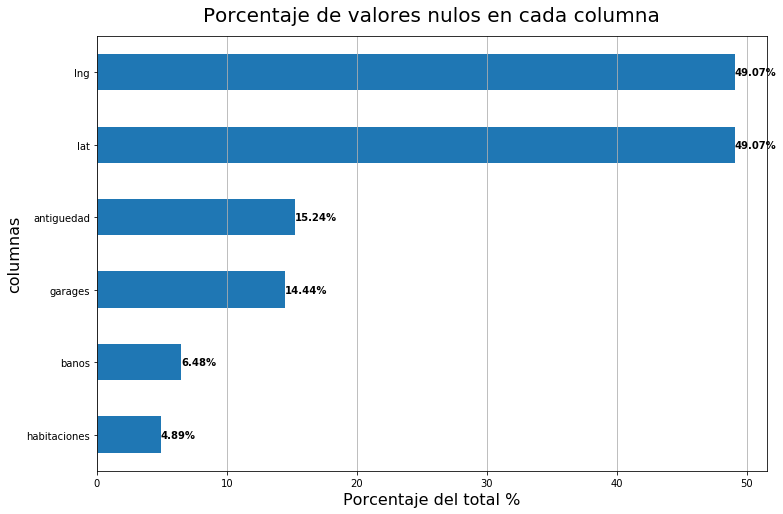

In [31]:
df1 = df[df.tipodepropiedad == 'Terreno comercial'].fillna(0)
df = df[df.tipodepropiedad != 'Terreno comercial']
df = pd.concat([df,df1])
nulls(df)

In [32]:
cond1= (df.tipodepropiedad == 'Terreno comercial') & (df.metroscubiertos !=0)
df.metroscubiertos = np.where(cond1,0,df.metroscubiertos)

## Resolviendo NaN en garages.

In [33]:
df.loc[df.garages.isnull()].groupby('tipodepropiedad').count().sort_values(by='precio')

,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
tipodepropiedad,,,,,,,,,,,,,,,,,
Lote,4,4,0,0,0,0,4,4,0,0,4,4,4,4,4,4,4
Departamento Compartido,4,4,4,4,0,4,4,4,3,3,4,4,4,4,4,4,4
Huerta,5,5,4,4,0,4,5,5,1,1,5,5,5,5,5,5,5
Duplex,7,7,6,7,0,6,7,7,4,4,7,7,7,7,7,7,7
Nave industrial,20,20,17,6,0,14,20,20,11,11,20,20,20,20,20,20,20
Terreno industrial,26,26,9,1,0,7,26,26,23,23,26,26,26,26,26,26,26
Local en centro comercial,45,45,35,4,0,15,45,45,28,28,45,45,45,45,45,45,45
Inmuebles productivos urbanos,50,50,49,34,0,25,50,50,36,36,50,50,50,50,50,50,50
Otros,82,82,79,25,0,27,82,82,71,71,82,82,82,82,82,82,82


In [34]:
# Me da la impresion que no tienen garage, y por eso no lo han cargado.  
# EN la gran mayoria de las filas, es el unico nan que hay.
filtro_garages_casas = df.loc[(df.tipodepropiedad=='Casa')&(df.garages.isnull())]
filtro_garages_casas

,tipodepropiedad,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
22,Casa,Ciudad Madero,Tamaulipas,0.0,4.0,NaN,1.0,179.0,224.0,22.264768,-97.841012,2013-12-12 00:00:00,0.0,0.0,0.0,0.0,0.0,1340000.0
24,Casa,Querétaro,Querétaro,4.0,3.0,NaN,3.0,258.0,258.0,20.559744,-100.367382,2013-09-26 00:00:00,0.0,0.0,0.0,1.0,1.0,3900000.0
34,Casa,Huixquilucan,Edo. de México,20.0,4.0,NaN,3.0,300.0,350.0,19.408373,-99.267617,2016-11-19 00:00:00,0.0,1.0,0.0,1.0,1.0,7900000.0
37,Casa,Tampico,Tamaulipas,NaN,3.0,NaN,2.0,145.0,146.0,22.219141,-97.862753,2016-12-25 00:00:00,0.0,0.0,0.0,0.0,0.0,1280000.0
49,Casa,Epazoyucan,Hidalgo,0.0,4.0,NaN,1.0,180.0,180.0,20.060287,-98.642384,2013-10-16 00:00:00,0.0,0.0,0.0,0.0,0.0,1000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239949,Casa,Pánuco,Veracruz,36.0,4.0,NaN,4.0,321.0,321.0,NaN,NaN,2016-04-08 00:00:00,0.0,0.0,0.0,0.0,0.0,2000000.0
239954,Casa,Coatzacoalcos,Veracruz,4.0,3.0,NaN,2.0,126.0,150.0,NaN,NaN,2012-08-06 00:00:00,0.0,0.0,0.0,1.0,0.0,1600000.0
239959,Casa,Mérida,Yucatán,3.0,3.0,NaN,4.0,320.0,320.0,NaN,NaN,2012-09-19 00:00:00,0.0,0.0,1.0,0.0,1.0,3200000.0
239974,Casa,Cuautitlán Izcalli,Edo. de México,4.0,3.0,NaN,3.0,173.0,403.0,19.632321,-99.248815,2015-08-05 00:00:00,0.0,0.0,0.0,0.0,0.0,3300000.0


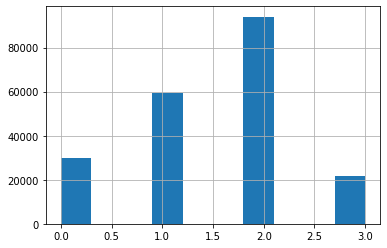

In [35]:
df['garages'].hist()

## XGBoost para predecir la cantidad de garages

In [60]:
garages_train = df.dropna()
garages_test = df.loc[df.garages.isnull()==True]
garages_test = (garages_test.dropna(subset=['tipodepropiedad', 'ciudad', 'provincia', 'antiguedad', 'habitaciones',
                                      'banos', 'metroscubiertos', 'metrostotales', 'lat', 'lng','fecha', 'gimnasio',
                                      'usosmultiples', 'piscina', 'escuelascercanas',
                                      'centroscomercialescercanos', 'precio']))

In [61]:
# Separamos los datos.
garages_train_x = garages_train.loc[:,['tipodepropiedad', 'ciudad', 'provincia', 'antiguedad', 'habitaciones',
                                      'banos', 'metroscubiertos', 'metrostotales', 'lat', 'lng','fecha', 'gimnasio',
                                      'usosmultiples', 'piscina', 'escuelascercanas',
                                      'centroscomercialescercanos', 'precio']]
garages_train_y = garages_train['garages']

garages_test_y = garages_test['garages']
garages_test_x = garages_test.dropna(subset=['tipodepropiedad', 'ciudad', 'provincia', 'antiguedad', 'habitaciones',
                                      'banos', 'metroscubiertos', 'metrostotales', 'lat', 'lng','fecha', 'gimnasio',
                                      'usosmultiples', 'piscina', 'escuelascercanas',
                                      'centroscomercialescercanos', 'precio'])

garages_test_x = garages_test_x.loc[:,['tipodepropiedad', 'ciudad', 'provincia', 'antiguedad', 'habitaciones',
                                      'banos', 'metroscubiertos', 'metrostotales', 'lat', 'lng','fecha', 'gimnasio',
                                      'usosmultiples', 'piscina', 'escuelascercanas',
                                      'centroscomercialescercanos', 'precio']]


In [62]:
garages_test = pd.merge(garages_test_x,garages_test_y,how='inner',left_index=True, right_index=True)
garages_test_y = garages_test['garages']
garages_test_x = garages_test_x.loc[:,['tipodepropiedad', 'ciudad', 'provincia', 'antiguedad', 'habitaciones',
                                      'banos', 'metroscubiertos', 'metrostotales', 'lat', 'lng','fecha', 'gimnasio',
                                      'usosmultiples', 'piscina', 'escuelascercanas',
                                      'centroscomercialescercanos', 'precio']]
print('Shape of test data: {}'.format(garages_test.shape))

Shape of test data: (10580, 18)


In [63]:
# Casteamos los dtypes a los correctos.
garages_train_x = garages_train_x.astype({
    "piscina": 'int16',
    "usosmultiples": 'int16',
    "escuelascercanas": 'int16',
    "centroscomercialescercanos": 'int16',
    "gimnasio":'int16',
    "antiguedad":'int16',
    "habitaciones":'int16',
    "banos":'int16',
    "metroscubiertos":'int16',
    "metrostotales":'int16',
    "fecha":np.datetime64
})
garages_train_y = garages_train_y.astype({'garages':'int16'})

garages_test_x = garages_test_x.astype({
    "piscina": 'int16',
    "usosmultiples": 'int16',
    "escuelascercanas": 'int16',
    "centroscomercialescercanos": 'int16',
    "gimnasio":'int16',
    "antiguedad":'int16',
    "habitaciones":'int16',
    "banos":'int16',
    "metroscubiertos":'int16',
    "metrostotales":'int16',
    "fecha":np.datetime64
})


In [64]:
garages_train_x.assign(
               day=garages_train_x.fecha.dt.day,
               month=garages_train_x.fecha.dt.month,
               year=garages_train_x.fecha.dt.year)
garages_train_x.drop(columns='fecha',inplace=True)

garages_test_x.assign(
               day=garages_test_x.fecha.dt.day,
               month=garages_test_x.fecha.dt.month,
               year=garages_test_x.fecha.dt.year)
garages_test_x.drop(columns='fecha',inplace=True)

In [65]:
garages_test_x.shape

(10580, 16)

Text(0.5, 0, 'Clases')

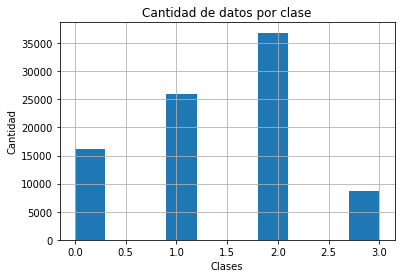

In [66]:
# Comprobemos la cantidad de clases y si están o no balanceadas.
garages_train_y.hist()
plt.title("Cantidad de datos por clase")
plt.ylabel('Cantidad')
plt.xlabel('Clases')

### Encoding de categoricas - Binary Encoding

In [67]:
import category_encoders as ce

In [68]:
catlist = ['tipodepropiedad', 'ciudad', 'provincia']
binary_enc = ce.BinaryEncoder()
binary_encoded = binary_enc.fit_transform(garages_train_x[catlist])

garages_train_x = garages_train_x.join(binary_encoded.add_suffix('bc'))
garages_train_x.drop(columns=catlist,inplace=True)
garages_test_x = garages_test_x.join(binary_encoded.add_suffix('bc'))
garages_test_x.drop(columns=catlist,inplace=True)

print('Shape of training data: {}'.format(garages_train_x.shape))
print('Shape of test data: {}'.format(garages_test_x.shape))

Shape of training data: (87575, 36)
Shape of test data: (10580, 36)


### Modelo - XGBoost

In [69]:
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

from datetime import datetime


In [70]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [71]:
params = {
        'min_child_weight': [5],
        'gamma': [1],
        'subsample': [0.8],
        'colsample_bytree': [0.8],
        'max_depth': [5],
        'n_estimators':[150,250,300,500]}

In [72]:
xgb = XGBClassifier(learning_rate=0.01,
                    silent=False, nthread=1)


In [73]:
folds = 7
param_comb = 4

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=4, cv=skf.split(garages_train_x,garages_train_y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(garages_train_x, garages_train_y)
timer(start_time) # timing ends here for "start_time" variable



Fitting 7 folds for each of 4 candidates, totalling 28 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/home/pintopicada/.local/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done  28 out of  28 | elapsed: 83.5min finished



 Time taken: 1 hours 35 minutes and 2.2 seconds.


In [76]:
random_search.score

<bound method BaseSearchCV.score of RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fd172260570>,
                   error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.01, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=1,
                                           objectiv...
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=False, subsample=1,
                                           verbosi